# Effect of Borrower APR Rate
###### Muhammad Ariq Farhansyah Mutyara

## Investigation Overview

In this investigation, We would like to see what affects the borrower's APR, The main focus that the Prosper Rating and Prosper Score. We also want to look at Loan Status, Income Range, and Occupation to see whether it is affected borrower's APR or not.

## Dataset Overview

There are more than 75,000 Borrower in the dataset with 14 features included Borrower APR, Prosper Rating, and Prosper Score, etc. 

In [2]:
#Import all essential packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('prosperLoanDataClean.csv')
df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,ProsperRating,ProsperScore,BorrowerState,Occupation,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors
0,1209647,36,Current,0.12016,A,7,CO,Professional,0.18,"$50,000-74,999",10000,318.93,1
1,658116,36,Current,0.12528,A,9,GA,Skilled Labor,0.15,"$25,000-49,999",10000,321.45,158
2,909464,36,Current,0.24614,D,4,MN,Executive,0.26,"$100,000+",15000,563.97,20
3,1074836,60,Current,0.15425,B,10,NM,Professional,0.36,"$100,000+",15000,342.37,1
4,750899,36,Current,0.31032,E,2,KS,Sales - Retail,0.27,"$25,000-49,999",3000,122.67,1


In [5]:
#Change the data type to categorical variabel

#Term Column
term = [12, 36, 60]
term_order = pd.api.types.CategoricalDtype(ordered=True, categories=term)
df['Term'] = df['Term'].astype(term_order)

#LoanStatus Column
df['LoanStatus'] = df['LoanStatus'].astype('category')

#ProsperRating Column
rating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
rating_order = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
df['ProsperRating'] = df['ProsperRating'].astype(rating_order)

#ProsperScore Column
score = [i for i in range(1,12)]
score_order = pd.api.types.CategoricalDtype(ordered=True, categories=score)
df['ProsperScore'] = df['ProsperScore'].astype(score_order)

#BorrowerState Column
df['BorrowerState'] = df['BorrowerState'].astype('category')

#Occupation Column
df['Occupation'] = df['Occupation'].astype('category')

#IncomeRange Column
income = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
income_order = pd.api.types.CategoricalDtype(ordered=True, categories=income)
df['IncomeRange'] = df['IncomeRange'].astype(income_order)

## Distribution of Borrower APR Rate

The Borrower APR Rate looks like a normal distribution and with the mean and median value almost slightly the same. But there is some high peak in the range of 30% to 35%.

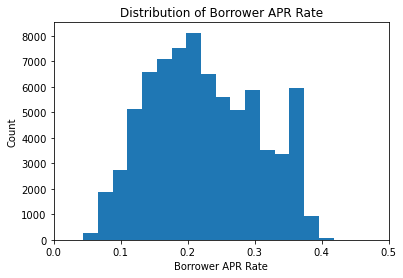

In [8]:
bin_edges = np.arange(0, df['BorrowerAPR'].max()+0.022, 0.022)
plt.hist(df['BorrowerAPR'], bins=bin_edges)
plt.title('Distribution of Borrower APR Rate')
plt.xlabel('Borrower APR Rate')
plt.ylabel('Count')
plt.xlim(0, 0.5);

## Borrower APR Rate vs. Prosper Score and Prosper Rating

There is a strong evidence that Prosper Score and Prosper Rating has a linear realtionship with Borrower APR Rate. With the higher the score or rating is, the lower the Borrower APR Rate would be.

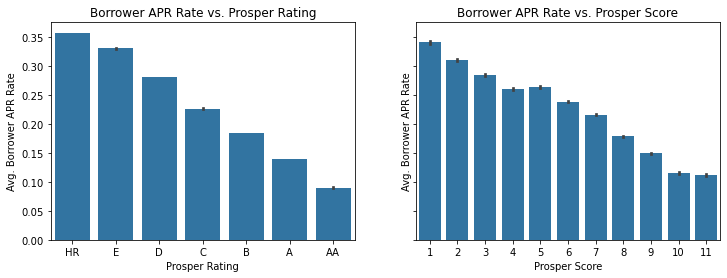

In [9]:
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(1, 2, figsize=[12, 4], sharey=True)

sns.barplot(ax=axes[0], data=df, x='ProsperRating', y='BorrowerAPR', color=base_color)
axes[0].set_title('Borrower APR Rate vs. Prosper Rating')
axes[0].set_xlabel('Prosper Rating')
axes[0].set_ylabel('Avg. Borrower APR Rate')
sns.barplot(ax=axes[1], data=df, x='ProsperScore', y='BorrowerAPR', color=base_color)
axes[1].set_title('Borrower APR Rate vs. Prosper Score')
axes[1].set_xlabel('Prosper Score')
axes[1].set_ylabel('Avg. Borrower APR Rate');

## Borrower APR Rate vs. Loan Status vs. Borrower Income Range

There is also obvious relationship when comparing Borrower APR Rate againts Loan Status and Income Range, with the more income they earn, the less likely they will get lower APR Rate, and also the most of the borrower who are defaulted tend to have a higher APR Rate than the other who are not defaulted. 

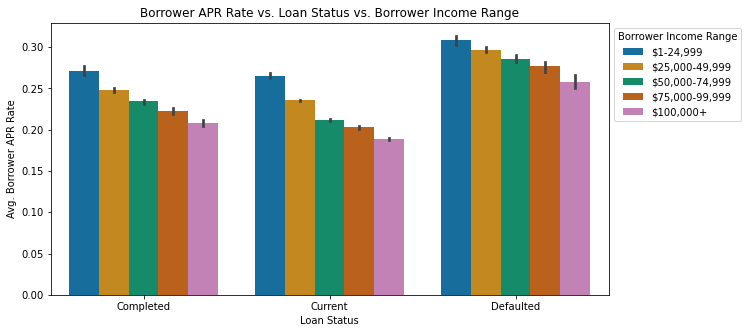

In [10]:
plt.figure(figsize = [10, 5])
sns.barplot(data=df, x='LoanStatus', y='BorrowerAPR', hue='IncomeRange', palette='colorblind')
plt.legend(title='Borrower Income Range', bbox_to_anchor=(1, 1))
plt.title('Borrower APR Rate vs. Loan Status vs. Borrower Income Range')
plt.xlabel('Loan Status')
plt.ylabel('Avg. Borrower APR Rate');

## Thank You